# Ylioppilastutkintodata

Tämä notebook käyttää Vipunen APIn kautta ladattua ylioppilastutkintadataa. Notebookin ohjeet ovat suomeksi, koska datan otsakkeet ovat suomeksi ja käytännössä dataa on vaikea käpistellä ymmärtämättä suomea. Koodi ja kommentit sentään ovat englanniksi.

Aloita ajamalla allaoleva koodinpätkä, joka lataa datan. Koodin voit ajamalla valitsemalla solun ja painamalla ctrl+R tai klikkaamalla ylärivin play-nappia.

In [4]:
# download the data to a local file as it is almost 100 megabytes
# this will take a while
from urllib.request import urlretrieve

destination = "/tmp/ytl_arvosanat.json"
url = "http://api.vipunen.fi/api/resources/ytl_arvosanat/data"
urlretrieve(url, destination)

('/tmp/ytl_arvosanat.json', <http.client.HTTPMessage at 0x7f571d328240>)

Lataus on valmis kun harmaan laatikon alle ilmestyy rivi, jokna vasemmassa reunassa on teksti joka näyttää osapuilleen seuraavalta.
```
Out[5]: ('/tmp/ytl_arvosanat.json', <http.client.HTTPMessage at 0x7f81c437b320>)
```

Kun data on latautunut, voit ajaa seuraavan solun.

In [5]:
import pandas as pd
import json
with open(destination, "r") as file_:
    df = pd.DataFrame.from_records(json.load(file_))
    
df["arvosanapisteet"] = df[["arvosanapisteet"]].astype(int)

df.dropna()

# pandas is not good about assuming which variables are categorical so we need to help it a bit
categorical_variables = ["opiskelijaKoodi", "arvosana", 
                         "arvosanaKoodi", "koe", "koeKoodi", "lukio", "lukioKoodi", 
                         "opetuskieli", "opetuskieliKoodi", "sukupuoli", "sukupuoliKoodi", 
                         "oppilaitostyyppi", "oppilaitostyyppiKoodi", "tutkintokerta", 
                         "tutkintokertaKoodi"]
for var in categorical_variables:
    df[var] = df[var].astype('category')

original_df = df

Noin, nyt data on oikeastaan aika siistissä muodossa ja sitä kelpaa käpistellä esimerkiksi [pandas-kirjastolla](http://pandas.pydata.org/).

Rajoitetaan vielä itseämme hieman ja suodatetaan kaikesta datasta vain kevään 2017 kirjoitukset. Datasetistä löytyvät myös 2015S, 2016K ja 2016S mikäli haluat tutkia lisää.

In [ ]:
df = original_df[original_df.tutkintokertaKoodi == "2017K"]
df.oppilaitostyyppi.describe()

In [105]:
df.arvosanapisteet.describe()

count    143108.000000
mean          4.441247
std           1.387852
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: arvosanapisteet, dtype: float64

## Englanti, pitkä oppimäärä

Tarkastellaan ensin opetuskielen ja pitkän englannin suhdetta.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81b40f8e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f81baefb4a8>], dtype=object)

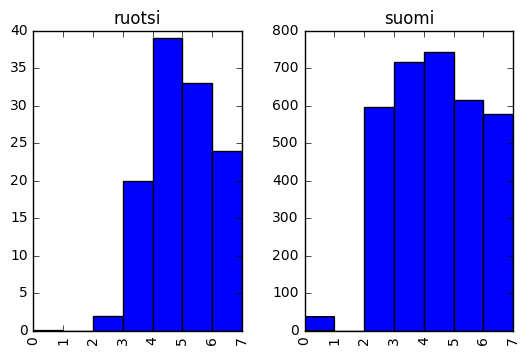

In [108]:
df[df.koe == "Englanti, pitkä oppimäärä"].hist(bins=range(8), by="opetuskieli", sharex=True)

Jakauma vaihtelee erittäin paljon tutkintkerrasta toiseen, erityisesti ruotsinkielisillä koska volyymi on niin pientä.

Suhteuttaminen ilmiöiden kokoon lienee paikallaan.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5710919438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5710b5ff60>], dtype=object)

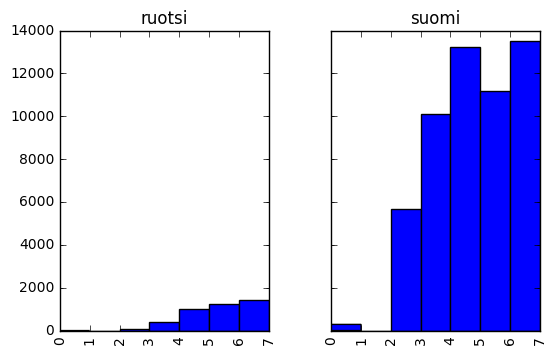

In [40]:
df[df.koe == "Englanti, pitkä oppimäärä"].hist(bins=range(8), by="opetuskieli", sharex=True, sharey=True)


## Äidinkieli

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f571c7cb080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f571ccbe470>], dtype=object)

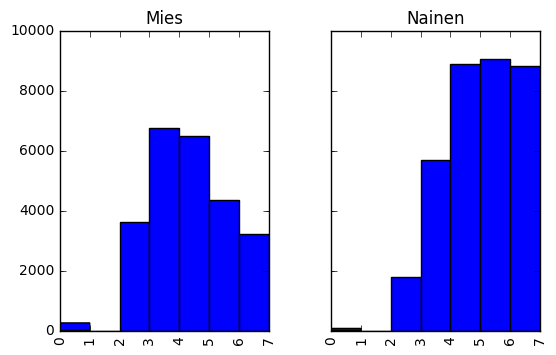

In [8]:
# Z A and O are codes for Essay writing
df[df["koeKoodi"].isin(["Z", "A", "O"])].hist(bins=range(8), by="sukupuoli", sharex=True, sharey=True)

## Matematiikka

Pitkä matematiikka on koekoodilla M ja lyhyt koodilla N.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5711d49e10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5711cd4c88>], dtype=object)

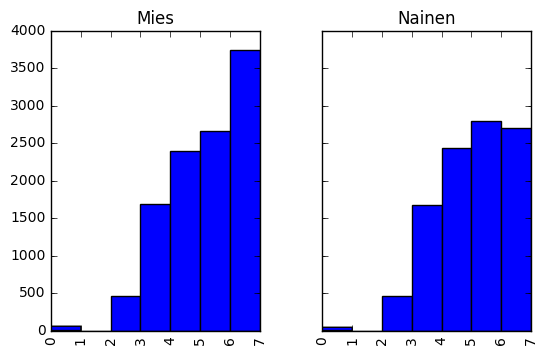

In [27]:
df[df.koeKoodi == "M"].hist(bins=range(8), by="sukupuoli", sharey=True)

On "yleisesti tiedossa", että pitkä matematiikka on nuorten miesten laji.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5711c5e240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5711bebc50>], dtype=object)

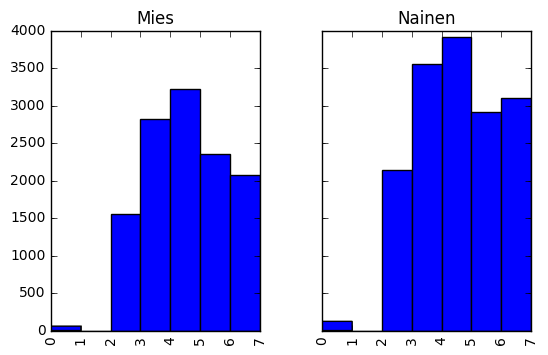

In [28]:
df[df.koeKoodi == "N"].hist(bins=range(8), by="sukupuoli", sharey=True)

Lyhyen matematiikan kohdalla taas hyvin kirjoittavien miesten osuus on pienempi.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f571096f6d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f571a6836d8>], dtype=object)

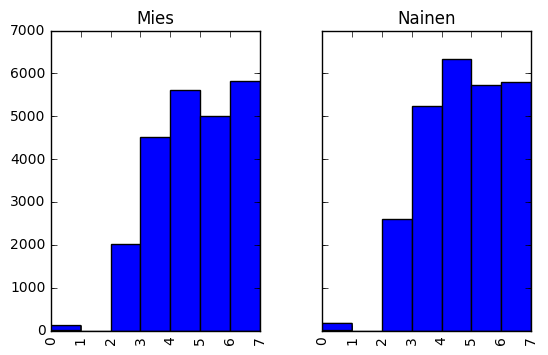

In [41]:
df[df["koeKoodi"].isin(["M", "N"])].hist(bins=range(8), by="sukupuoli", sharey=True)

Arvosanajakauma on paljon tasaisempi kun lyhyen ja pitkän matematiikan kirjoittajat plotataan yhdessä. Käytössä olevan datan perusteella ei voida arvioida johtuuko ero laadullisesta erosta sukupuolten välillä vai erilaisista ympäristötekijöistä.